In [30]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [31]:
with open("bootstrap_data_2024_25.json", "r") as f:
    data = json.load(f)

bootstrap_api_pd = pd.DataFrame(data['elements'])

In [32]:
print(bootstrap_api_pd.columns.to_list())

['can_transact', 'can_select', 'chance_of_playing_next_round', 'chance_of_playing_this_round', 'code', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam', 'news', 'news_added', 'now_cost', 'photo', 'points_per_game', 'removed', 'second_name', 'selected_by_percent', 'special', 'squad_number', 'status', 'team', 'team_code', 'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out', 'transfers_out_event', 'value_form', 'value_season', 'web_name', 'region', 'team_join_date', 'birth_date', 'has_temporary_code', 'opta_code', 'minutes', 'goals_scored', 'assists', 'clean_sheets', 'goals_conceded', 'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat', 'ict_index', 'starts', 'expected_goals', 'expected_assists', 'expected_goal_involvements'

- There are a lot of columns, but we will use whichever we want to

In [33]:
players_managers_df = bootstrap_api_pd[['first_name','second_name','web_name','team_code','minutes','starts','birth_date','element_type','code']]
players_managers_df.set_index('code')

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type
code,,,,,,,,
438098,Fábio,Ferreira Vieira,Fábio Vieira,3,0,0,None,3
205651,Gabriel,Fernando de Jesus,G.Jesus,3,600,6,1997-04-03,4
226597,Gabriel,dos Santos Magalhães,Gabriel,3,2363,28,1997-12-19,2
219847,Kai,Havertz,Havertz,3,1872,21,1999-06-11,4
463748,Karl,Hein,Hein,3,0,0,None,1
...,...,...,...,...,...,...,...,...
516939,Emmanuel,Agbadou,Agbadou,39,1410,16,1997-06-17,2
100040854,Vítor Manuel,de Oliveira Lopes Pereira,Pereira,39,0,0,1968-07-26,5
531170,Nasser,Djiga,Djiga,39,65,1,2002-11-15,2


In [34]:
print(f'Number of entries: {players_managers_df.shape[0]}')

Number of entries: 804


It contains all managers, players who haven't played any minutes, so let's just remove them

In [35]:
managers_df =  players_managers_df[(players_managers_df['element_type'] == 5)]
managers_df

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code
32,Mikel,Arteta,Arteta,3,0,0,1982-03-26,5,100051017
79,Unai,Emery,Emery,7,0,0,1971-11-03,5,100037568
121,Andoni,Iraola,Iraola,91,0,0,1982-06-22,5,100050427
157,Thomas,Frank,Frank,94,0,0,1973-10-09,5,100042830
208,Fabian,Hürzeler,Hürzeler,36,0,0,1993-02-26,5,100053901
256,Enzo,Maresca,Maresca,8,0,0,1980-02-10,5,100048548
297,Oliver,Glasner,Glasner,31,0,0,1974-08-28,5,100044409
330,David,Moyes,Moyes,11,0,0,1963-04-25,5,100000084
364,Marco Alexandre,Saraiva da Silva,Silva,54,0,0,1977-07-12,5,100041800
402,Kieran,McKenna,McKenna,40,0,0,1986-05-14,5,100047417


In [36]:
players_who_played = players_managers_df[players_managers_df['minutes'] > 0]
players_who_played.head()

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code
1,Gabriel,Fernando de Jesus,G.Jesus,3,600,6,1997-04-03,4,205651
2,Gabriel,dos Santos Magalhães,Gabriel,3,2363,28,1997-12-19,2,226597
3,Kai,Havertz,Havertz,3,1872,21,1999-06-11,4,219847
5,Jurriën,Timber,J.Timber,3,2415,27,2001-06-17,2,445122
6,Jorge Luiz,Frello Filho,Jorginho,3,701,9,1991-12-20,3,85955


In [37]:
print(f'Number of players who have played atleast a minute: {players_who_played.shape[0]}')

Number of players who have played atleast a minute: 562


In [38]:
players_who_started = players_managers_df[players_managers_df['starts'] > 0]
players_who_started.head()


,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code
1,Gabriel,Fernando de Jesus,G.Jesus,3,600,6,1997-04-03,4,205651
2,Gabriel,dos Santos Magalhães,Gabriel,3,2363,28,1997-12-19,2,226597
3,Kai,Havertz,Havertz,3,1872,21,1999-06-11,4,219847
5,Jurriën,Timber,J.Timber,3,2415,27,2001-06-17,2,445122
6,Jorge Luiz,Frello Filho,Jorginho,3,701,9,1991-12-20,3,85955


In [39]:
print(f'Number of players who have started atleast a match: {players_who_started.shape[0]}')

Number of players who have started atleast a match: 492


In [40]:
players_who_played['first_name'].value_counts().head()

first_name
James    9
Ben      7
Harry    7
Ryan     7
Jack     6
Name: count, dtype: int64

- There are 9 James who have played. Let's see who they are.

In [41]:
players_who_played[players_who_played['first_name'] == 'James']

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code
90,James,Hill,Hill,91,443,6,2002-01-10,2,463981
180,James,Milner,Milner,36,170,3,1986-01-04,3,15157
305,James,Garner,Garner,11,1590,17,2001-03-13,3,232928
317,James,Tarkowski,Tarkowski,11,2922,33,1992-11-19,2,17761
419,James,Justin,Justin,13,2912,34,1998-02-23,2,220627
499,James,McAtee,McAtee,43,340,3,2002-10-18,3,432714
644,James,Bree,Bree,20,1070,13,1997-12-11,2,184386
694,James,Maddison,Maddison,6,1799,21,1996-11-23,3,172780
745,James,Ward-Prowse,Ward-Prowse,21,1433,17,1994-11-01,3,101178


In [42]:
players_who_played = players_who_played.copy()
players_who_played[['year', 'month', 'day']] = players_who_played['birth_date'].str.split('-', expand=True)
players_who_played


,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code,year,month,day
1,Gabriel,Fernando de Jesus,G.Jesus,3,600,6,1997-04-03,4,205651,1997,04,03
2,Gabriel,dos Santos Magalhães,Gabriel,3,2363,28,1997-12-19,2,226597,1997,12,19
3,Kai,Havertz,Havertz,3,1872,21,1999-06-11,4,219847,1999,06,11
5,Jurriën,Timber,J.Timber,3,2415,27,2001-06-17,2,445122,2001,06,17
6,Jorge Luiz,Frello Filho,Jorginho,3,701,9,1991-12-20,3,85955,1991,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...
796,Alfie,Pond,Pond,39,1,0,2004-03-01,2,517179,2004,03,01
799,Emmanuel,Agbadou,Agbadou,39,1410,16,1997-06-17,2,516939,1997,06,17
801,Nasser,Djiga,Djiga,39,65,1,2002-11-15,2,531170,2002,11,15
802,Marshall,Munetsi,Munetsi,39,1077,12,1996-06-22,3,433312,1996,06,22


In [43]:
lfc_plaayer_df = players_who_played[players_who_played['team_code'] == 14]
lfc_plaayer_df.sort_values(by='minutes',ascending=False)

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code,year,month,day
464,Mohamed,Salah,M.Salah,14,3374,38,1992-06-15,3,118748,1992,06,15
474,Virgil,van Dijk,Virgil,14,3330,37,1991-07-08,2,97032,1991,07,08
459,Ryan,Gravenberch,Gravenberch,14,3160,37,2002-05-16,3,441266,2002,05,16
465,Alexis,Mac Allister,Mac Allister,14,2597,30,1998-12-24,3,243016,1998,12,24
462,Ibrahima,Konaté,Konaté,14,2561,30,1999-05-25,2,204716,1999,05,25
447,Alisson,Ramses Becker,A.Becker,14,2508,28,1992-10-02,1,116535,1992,10,02
472,Dominik,Szoboszlai,Szoboszlai,14,2485,29,2000-10-25,3,424876,2000,10,25
471,Andrew,Robertson,Robertson,14,2479,29,1994-03-11,2,122798,1994,03,11
463,Luis,Díaz,Luis Díaz,14,2393,28,1997-01-13,3,244731,1997,01,13
448,Trent,Alexander-Arnold,Alexander-Arnold,14,2362,28,1998-10-07,2,169187,1998,10,07


In [44]:
np.round(lfc_plaayer_df['year'].dropna().astype(int).describe(),2)

count      23.00
mean     1997.78
std         3.62
min      1991.00
25%      1996.00
50%      1998.00
75%      2000.50
max      2003.00
Name: year, dtype: float64

In [45]:
players_who_played.sort_values(by='code').head(10)

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code,year,month,day
180,James,Milner,Milner,36,170,3,1986-01-04,3,15157,1986,01,04
317,James,Tarkowski,Tarkowski,11,2922,33,1992-11-19,2,17761,1992,11,19
319,Ashley,Young,Young,11,1864,19,1985-07-09,2,18892,1985,07,09
735,Łukasz,Fabiański,Fabianski,21,1160,13,1985-04-18,1,37096,1985,04,18
528,Jonny,Evans,Evans,1,312,3,1988-01-03,2,37642,1988,01,03
650,Adam,Lallana,Lallana,20,352,5,1988-05-10,3,39155,1988,05,10
688,Fraser,Forster,Forster,6,630,7,1988-03-17,1,40383,1988,03,17
365,Willian,Borges da Silva,Willian,54,251,2,1988-08-09,3,47431,1988,08,09
188,Jason,Steele,Steele,36,180,2,1990-08-18,1,49262,1990,08,18
194,Danny,Welbeck,Welbeck,36,2109,24,1990-11-26,4,50175,1990,11,26


Let's see who's birthday is in May

In [46]:
players_who_played[players_who_played['month'] == '06'].sort_values(by='day')

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code,year,month,day
445,Jake,Evans,Jake Evans,13,21,0,2008-06-04,3,630664,2008,06,04
16,Kieran,Tierney,Tierney,3,250,2,1997-06-05,2,192895,1997,06,05
759,Rayan,Aït-Nouri,Aït-Nouri,39,3112,37,2001-06-06,2,448514,2001,06,06
599,Álex,Moreno Lopera,Alex Moreno,17,952,11,1993-06-08,2,106468,1993,06,08
190,Jan Paul,van Hecke,Van Hecke,36,2960,33,2000-06-08,2,469142,2000,06,08
429,Luke,Thomas,Thomas,13,1109,13,2001-06-10,2,244619,2001,06,10
3,Kai,Havertz,Havertz,3,1872,21,1999-06-11,4,219847,1999,06,11
127,Mark,Flekken,Flekken,94,3275,37,1993-06-13,1,118342,1993,06,13
15,Thomas,Partey,Thomas,3,2793,31,1993-06-13,3,167199,1993,06,13
654,Ryan,Manning,Manning,20,1458,18,1996-06-14,2,204863,1996,06,14


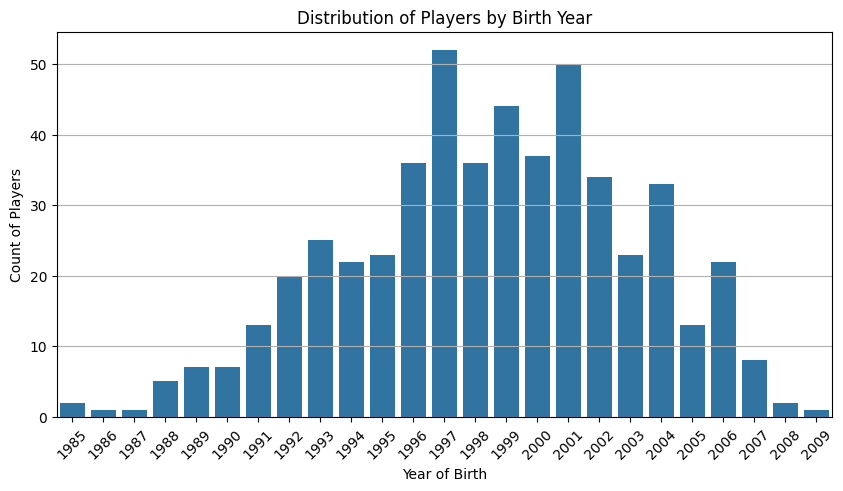

In [47]:
year_counts = players_who_played['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel("Year of Birth")
plt.ylabel("Count of Players")
plt.title("Distribution of Players by Birth Year")
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.show()


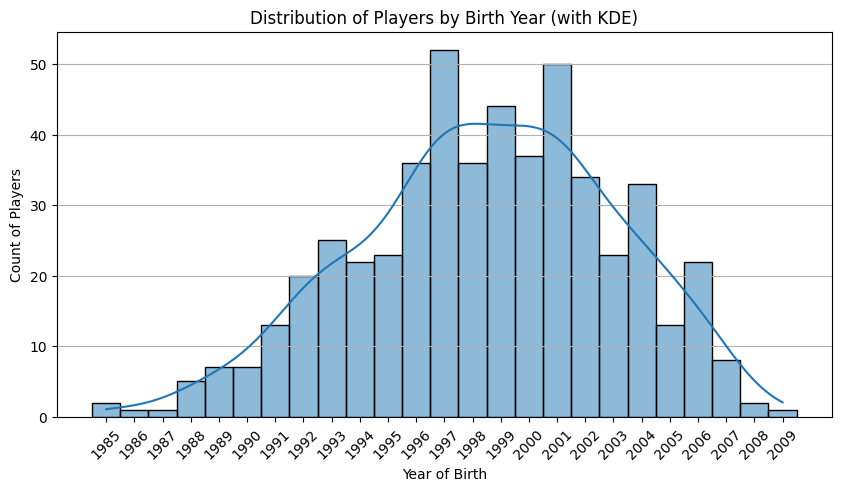

In [48]:
plt.figure(figsize=(10, 5))
sns.histplot(players_who_played['year'].sort_values(), kde=True, bins=30)
plt.xlabel("Year of Birth")
plt.ylabel("Count of Players")
plt.title("Distribution of Players by Birth Year (with KDE)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


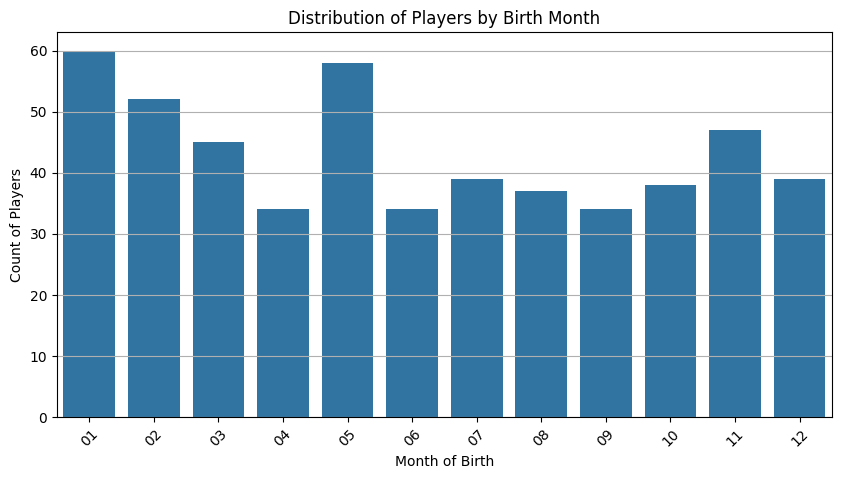

In [49]:
year_counts = players_who_played['month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel("Month of Birth")
plt.ylabel("Count of Players")
plt.title("Distribution of Players by Birth Month")
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.show()


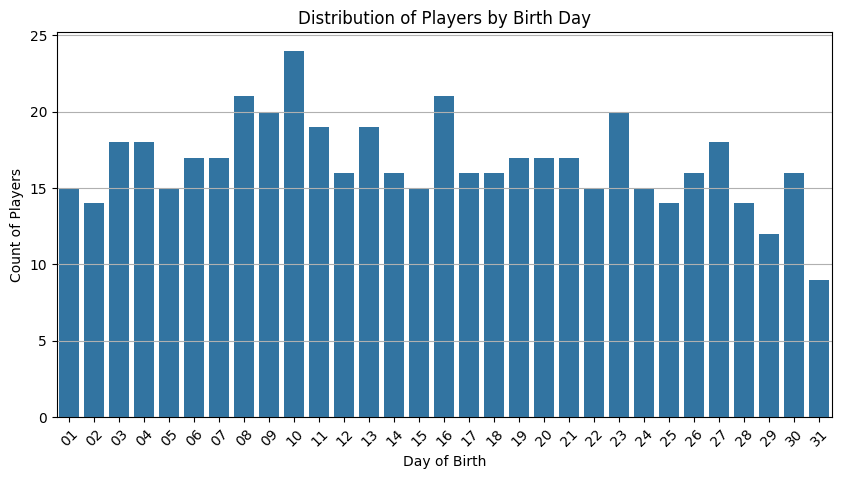

In [50]:
year_counts = players_who_played['day'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.xlabel("Day of Birth")
plt.ylabel("Count of Players")
plt.title("Distribution of Players by Birth Day")
plt.xticks(rotation=45) 
plt.grid(axis='y')
plt.show()


In [51]:
players_who_played[players_who_played['year'] == '2009'].sort_values(by='month')

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code,year,month,day
443,Jeremy,Monga,Monga,13,105,0,2009-07-10,3,649208,2009,07,10


In [52]:
players_who_played[players_who_played['year'] == '1985'].sort_values(by='minutes',ascending=False)

,first_name,second_name,web_name,team_code,minutes,starts,birth_date,element_type,code,year,month,day
319,Ashley,Young,Young,11,1864,19,1985-07-09,2,18892,1985,07,09
735,Łukasz,Fabiański,Fabianski,21,1160,13,1985-04-18,1,37096,1985,04,18
